Импортируем библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 8.2 MB 1.0 MB/s 


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import csv
import numpy as np
from collections import Counter
import matplotlib as mt
import matplotlib.pyplot as plt
import pylab
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df_1 = pd.read_csv(r'/content/data2.csv')


In [ ]:
df_1 = pd.read_csv(r'/content/data2.csv')


In [ ]:
print(df_1)

                                                 Review Rating  Unnamed: 2
0     3D Touch просто восхитительная вещь! Заряд дер...      5         NaN
1     Отключается при температуре близкой к нулю, не...      4         NaN
2     В Apple окончательно решили не заморачиваться,...      3         NaN
3     Постарался наиболее ёмко и коротко описать все...      4         NaN
4     Достойный телефон. Пользоваться одно удовольст...      5         NaN
...                                                 ...    ...         ...
1495  Хороший телефон, но главное беда фотокамера. В...      3         NaN
1496  Хороший телефон, удобный в использовании, за п...      5         NaN
1497  Купил телефон утром, к вечеру заметил что при ...      2         NaN
1498  Сам по себе датчик приближения работает, но ст...      1         NaN
1499                                   Отличный телефон      5         NaN

[1500 rows x 3 columns]


In [ ]:
nltk.download('stopwords')

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()


def lemmatize(doc):
    doc = re.sub(patterns, ' ', str(doc))
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    return tokens

    df = df_1.iloc[:, 0]
    data = df.apply(lemmatize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def lemmatize(doc):
    doc = re.sub(patterns, ' ', str(doc))
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    return tokens

In [ ]:
df = df_1.iloc[:, 0]

In [ ]:
data = df.apply(lemmatize)
print(data)

0       [просто, восхитительный, вещь, заряд, держать,...
1       [отключаться, температура, близкий, нуль, непо...
2       [в, окончательно, решить, заморачиваться, дела...
3       [постараться, наиболее, ёмко, коротко, описать...
4       [достойный, телефон, пользоваться, один, удово...
                              ...                        
1495    [хороший, телефон, главное, беда, фотокамера, ...
1496    [хороший, телефон, удобный, использование, пол...
1497    [купить, телефон, утром, вечер, заметить, прос...
1498    [сам, датчик, приближение, работать, стоить, о...
1499                                  [отличный, телефон]
Name: Review, Length: 1500, dtype: object


In [ ]:
words = []
for word in data:
    for token_word in word:
        words.append(token_word)

words = list(set(words))

data_list = []
for word in data:
  data_list.append(word)

corpus_of_frequencies = []
token_list = []
for word_list in data:
  counter = Counter(word_list)
  corpus_of_frequencies.append(counter)
for i in corpus_of_frequencies:
  i = dict(i)
  token_list.append(i)
print(token_list)

[{'просто': 1, 'восхитительный': 1, 'вещь': 1, 'заряд': 1, 'держать': 1, 'целый': 1, 'день': 1, 'в': 1, 'розовый': 1, 'цвет': 1, 'смотреться': 1, 'очень': 2, 'необычно': 1, 'быстрый': 1, 'удобный': 1, 'весь': 1, 'советовать': 1, 'телефон': 1}, {'отключаться': 1, 'температура': 1, 'близкий': 1, 'нуль': 1, 'непонятно': 1, 'вести': 1, 'батарея': 1}, {'в': 1, 'окончательно': 1, 'решить': 1, 'заморачиваться': 1, 'делать': 1, 'незначительный': 1, 'изменение': 2, 'телефон': 3, 'выдавать': 1, 'инновация': 1, 'на': 1, 'скопировать': 1, 'функционал': 1, 'дизайн': 1, 'цена': 1, 'неадекватно': 1, 'завысить': 1, 'скачок': 1, 'курс': 1, 'говорить': 1, 'приходиться': 1, 'многие': 1, 'сказать': 2, 'разрешение': 1, 'достаточно': 1, 'диагональ': 1, 'оно': 1, 'аппарат': 1, 'позиционироваться': 1, 'топовый': 1, 'решение': 1, 'итог': 1, 'получать': 1, 'банальный': 1, 'экономия': 1, 'производитель': 1, 'произойти': 1, 'время': 1, 'работа': 1, 'увеличить': 1, 'гб': 1, 'оперативка': 1, 'прошлый': 1, 'век': 1,

In [ ]:
data_list = []
for word in data:
  data_list.append(word)

In [ ]:
corpus_of_frequencies = []
token_list = []
for word_list in data:
  counter = Counter(word_list)
  corpus_of_frequencies.append(counter)
for i in corpus_of_frequencies:
  i = dict(i)
  token_list.append(i)
print(token_list)

[{'просто': 1, 'восхитительный': 1, 'вещь': 1, 'заряд': 1, 'держать': 1, 'целый': 1, 'день': 1, 'в': 1, 'розовый': 1, 'цвет': 1, 'смотреться': 1, 'очень': 2, 'необычно': 1, 'быстрый': 1, 'удобный': 1, 'весь': 1, 'советовать': 1, 'телефон': 1}, {'отключаться': 1, 'температура': 1, 'близкий': 1, 'нуль': 1, 'непонятно': 1, 'вести': 1, 'батарея': 1}, {'в': 1, 'окончательно': 1, 'решить': 1, 'заморачиваться': 1, 'делать': 1, 'незначительный': 1, 'изменение': 2, 'телефон': 3, 'выдавать': 1, 'инновация': 1, 'на': 1, 'скопировать': 1, 'функционал': 1, 'дизайн': 1, 'цена': 1, 'неадекватно': 1, 'завысить': 1, 'скачок': 1, 'курс': 1, 'говорить': 1, 'приходиться': 1, 'многие': 1, 'сказать': 2, 'разрешение': 1, 'достаточно': 1, 'диагональ': 1, 'оно': 1, 'аппарат': 1, 'позиционироваться': 1, 'топовый': 1, 'решение': 1, 'итог': 1, 'получать': 1, 'банальный': 1, 'экономия': 1, 'производитель': 1, 'произойти': 1, 'время': 1, 'работа': 1, 'увеличить': 1, 'гб': 1, 'оперативка': 1, 'прошлый': 1, 'век': 1,

In [ ]:
with open('/content/token.csv', 'w', newline='') as file:
  writer = csv.DictWriter(file, fieldnames=words)
  writer.writeheader()
  writer.writerows(token_list)
  file.close

df = pd.read_csv('/content/token.csv')
ds = df.fillna(0)
ds.to_csv('/content/tokens.csv')

df = pd.read_csv(r'/content/tokens.csv')
X = df.values
X = np.delete(X, 0, axis=1)

tfidfconverter = TfidfTransformer()
A = tfidfconverter.fit_transform(X).toarray()

In [ ]:
df = pd.read_csv('/content/token.csv')
ds = df.fillna(0)
ds.to_csv('/content/tokens.csv')

In [ ]:
df = pd.read_csv(r'/content/tokens.csv')
X = df.values
X = np.delete(X, 0, axis=1)

In [ ]:
tfidfconverter = TfidfTransformer()
A = tfidfconverter.fit_transform(X).toarray()

In [ ]:
# def normalize(nach_matr, dtype=object):
#     num_rows_and_columns = nach_matr.shape[1]  # Находим количество столбцов матрицы
#     rezult_matrix = np.empty((num_rows_and_columns, num_rows_and_columns), dtype="object")  # Задаем пустую матрицу
#     for i in range(num_rows_and_columns):
#         vec = nach_matr[:,i]  # Отделяем столбец от матрицы
#         dvec = np.sqrt(np.dot(vec, vec))# Считаем его длину
#         vec = vec / dvec# Делим вектор на его длину
#         c = []
#         for i in vec:
#            c.append(np.round(i, 10))
#         vec = c
#         vec = np.reshape(vec, (num_rows_and_columns, 1))
#         rezult_matrix = np.c_[rezult_matrix, vec]# Записываем столбец в конечную матрицу
#     rezult_matrix = np.delete(rezult_matrix, np.s_[:num_rows_and_columns], 1)
#     return rezult_matrix# Возвращаем матрицу

# Вычисляем А*А^T
AA_T = np.matmul(A, np.transpose(A))

# Вычисляем А^T*A
A_TA = np.matmul(np.transpose(A), A)

# Вычисляем собственные вектора и собственные числа матрицы АА^Т
sch1, sv1 = np.linalg.eig(AA_T)

# Вычисляем собственные вектора и собственные числа матрицы А^ТA
sch2, sv2 = np.linalg.eig(A_TA)

# Находим матрицу V
V = sv2.real

# Находим матрицу U
U = sv1.real

# Находим матрицу S
sch1.sort()

sing_znach = []
for i in range(len(sch1)):
  sing_znach.append(np.sqrt(sch1[i]))
sing_znach.sort(reverse=True)

m = U.shape[1]
n = V.shape[1]

S = np.zeros((m, n))
np.fill_diagonal(S, sing_znach)
s_z = np.diagonal(S)

/usr/local/lib/python3.7/dist-packages/numpy/lib/index_tricks.py:909: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val


In [ ]:
sing_znach = []
for i in range(len(sch1)):
  sing_znach.append(np.sqrt(sch1[i]))
sing_znach.sort(reverse=True)

m = U.shape[1]
n = V.shape[1]

S = np.zeros((m, n))
np.fill_diagonal(S, sing_znach)
s_z = np.diagonal(S)
print(s_z)

NameError: ignored

In [ ]:
m = A.shape[0]
fig = plt.figure(figsize=(30, 10))
sing_vals = np.arange(m)
eigvals = s_z**2 / np.sum(s_z**2)
plt.plot(sing_vals, eigvals,'bo-', linewidth=1)
plt.title('График каменистой осыпи')
plt.xlabel('Переменные')
plt.ylabel('Решения')
plt.xticks([0, 100, 150, 200, 250, 300, 400, 600, 800, 1000, 1200, 1400], size=10)
plt.show()

In [ ]:
U_V = np.multiply.outer(U[:, 1], np.transpose(V[:, 1]))
A_k = s_z[1]*(U_V)
for i in range(1, 151):
  sigma = s_z[i]
  U_V = np.multiply.outer(U[:, i], np.transpose(V[:, i]))
  A_k = A_k + sigma*(U_V)

In [ ]:
X = np.round(A_k, 5)
Y = df_1.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X)

[[-1.260e-03 -7.000e-05  7.860e-03 ... -3.000e-04 -7.190e-03 -1.090e-03]
 [ 1.740e-03  4.300e-04  3.000e-05 ... -2.200e-04  1.920e-03 -2.500e-04]
 [-3.300e-04  1.530e-03  2.950e-03 ... -2.100e-04  3.500e-04  3.000e-04]
 ...
 [ 1.110e-03  1.080e-03 -6.640e-03 ...  4.400e-04 -1.720e-03 -1.210e-03]
 [ 6.420e-03  1.490e-03 -2.229e-02 ... -1.300e-04 -9.000e-05 -1.090e-03]
 [-9.000e-04 -8.800e-04  3.600e-04 ...  6.200e-04  2.350e-03 -1.670e-03]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Mean Error')

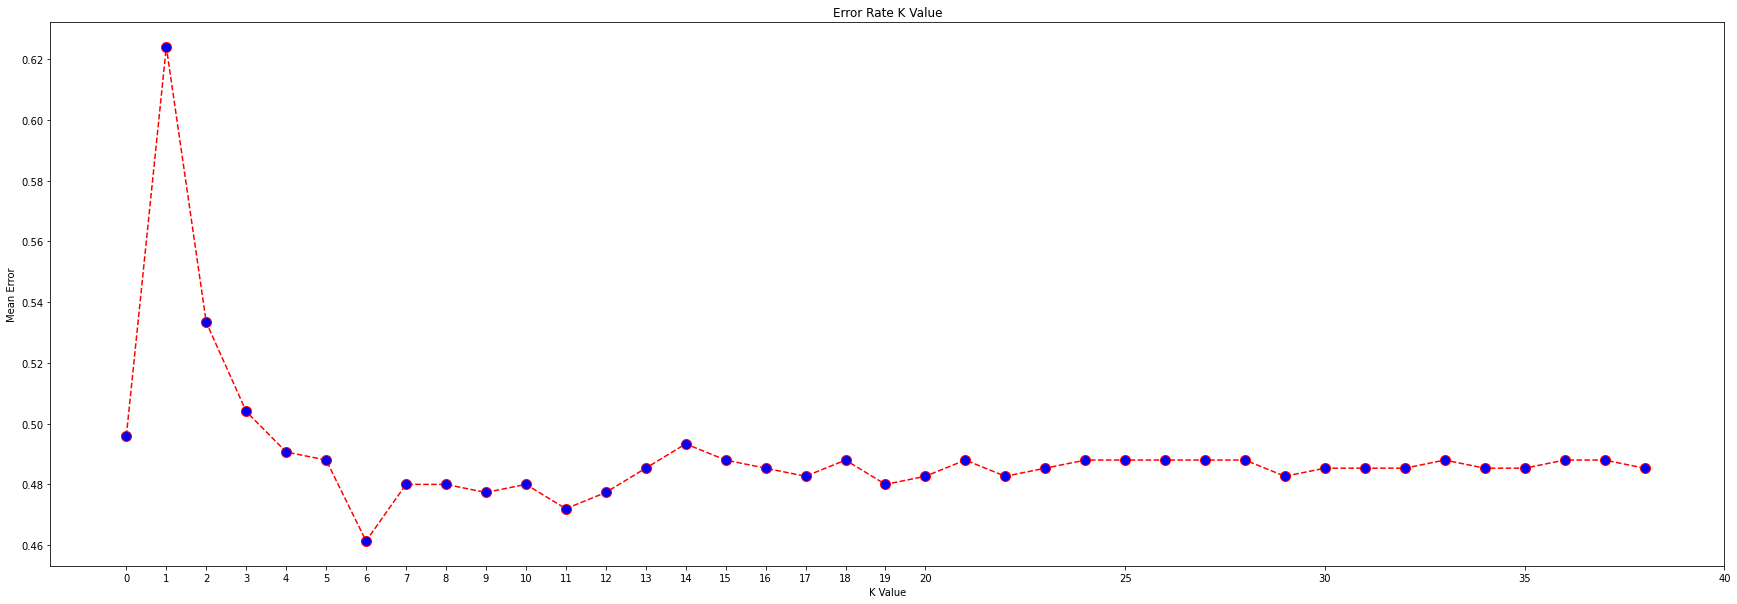

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

fig = plt.figure(figsize=(30, 10))
plt.plot(error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40], size=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))

                                   precision    recall  f1-score   support

)Самый сбалансированный смартфон.       0.00      0.00      0.00         1
                                1       0.67      0.12      0.20        17
                                2       0.33      0.11      0.17        36
                                3       0.10      0.03      0.04        40
                                4       0.39      0.18      0.25        89
                                5       0.55      0.88      0.67       192

                         accuracy                           0.51       375
                        macro avg       0.34      0.22      0.22       375
                     weighted avg       0.45      0.51      0.43       375



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(Y_test, predictions))

[[  0   0   0   0   0   1]
 [  0   2   0   2   1  12]
 [  0   1   4   4   5  22]
 [  0   0   4   1   2  33]
 [  0   0   1   0  16  72]
 [  0   0   3   3  17 169]]
